In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path  = '/home/sam/Desktop/MachienLearning/BikeShare/'

In [3]:
chi = pd.read_csv(path+'Chicago.csv')
nyc = pd.read_csv(path+'Nyc.csv')
Wash = pd.read_csv(path+'Washington.csv')

In [4]:
df = chi

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72131 entries, 0 to 72130
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   trip_id            72131 non-null  int64  
 1   starttime          72131 non-null  object 
 2   stoptime           72131 non-null  object 
 3   bikeid             72131 non-null  int64  
 4   tripduration       72131 non-null  int64  
 5   from_station_id    72131 non-null  int64  
 6   from_station_name  72131 non-null  object 
 7   to_station_id      72131 non-null  int64  
 8   to_station_name    72131 non-null  object 
 9   usertype           72131 non-null  object 
 10  gender             54977 non-null  object 
 11  birthyear          54986 non-null  float64
dtypes: float64(1), int64(5), object(6)
memory usage: 6.6+ MB


In [6]:
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,9080545,3/31/2016 23:30,3/31/2016 23:46,2295,926,156,Clark St & Wellington Ave,166,Ashland Ave & Wrightwood Ave,Subscriber,Male,1990.0
1,9080521,3/31/2016 22:59,3/31/2016 23:02,3439,198,259,California Ave & Francis Pl,276,California Ave & North Ave,Subscriber,Male,1974.0
2,9080479,3/31/2016 22:24,3/31/2016 22:26,4337,124,344,Ravenswood Ave & Lawrence Ave,242,Damen Ave & Leland Ave,Subscriber,Female,1992.0
3,9080475,3/31/2016 22:22,3/31/2016 22:41,3760,1181,318,Southport Ave & Irving Park Rd,458,Broadway & Thorndale Ave,Subscriber,Female,1979.0
4,9080443,3/31/2016 22:08,3/31/2016 22:19,1270,656,345,Lake Park Ave & 56th St,426,Ellis Ave & 60th St,Subscriber,Female,1997.0


In [7]:
# lets remove string variables
string_var = [col for col in df.columns if 'name' in col]

In [8]:
df.drop(string_var, axis=1, inplace =True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72131 entries, 0 to 72130
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   trip_id          72131 non-null  int64  
 1   starttime        72131 non-null  object 
 2   stoptime         72131 non-null  object 
 3   bikeid           72131 non-null  int64  
 4   tripduration     72131 non-null  int64  
 5   from_station_id  72131 non-null  int64  
 6   to_station_id    72131 non-null  int64  
 7   usertype         72131 non-null  object 
 8   gender           54977 non-null  object 
 9   birthyear        54986 non-null  float64
dtypes: float64(1), int64(5), object(4)
memory usage: 5.5+ MB


In [10]:
# lets convert time variables
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])

In [11]:
df['day'] = df['stoptime'].dt.day - df['starttime'].dt.day
df['month'] = df['stoptime'].dt.month - df['starttime'].dt.month
df['year'] = df['stoptime'].dt.year - df['starttime'].dt.year

In [12]:
# find out max duration of riding
df['duration'] = df['stoptime'] - df['starttime']

In [13]:
a = df['duration'].dt.components['hours']
b = df['duration'].dt.components['minutes']
c= df['duration'].dt.components['seconds']
d= df['duration'].dt.days

In [14]:
df['dur'] = a + b + c + d

In [15]:
i = np.arange(1, 72132, 1)

In [16]:
df['dur'].describe()

count    72131.000000
mean        14.165754
std         10.041163
min          1.000000
25%          7.000000
50%         12.000000
75%         19.000000
max         73.000000
Name: dur, dtype: float64

/home/sam/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='dur'>

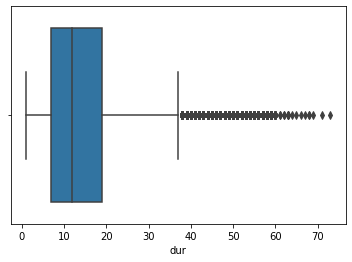

In [17]:
sns.boxplot(df['dur'])

## Which bike was most far rided??

In [18]:
df[df['dur'] == 73]

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,to_station_id,usertype,gender,birthyear,day,month,year,duration,dur
57035,10507693,2016-07-04 19:16:00,2016-07-05 15:10:00,525,71662,518,495,Subscriber,Male,1984.0,1,0,0,0 days 19:54:00,73


In [19]:
df.drop([col for col in df.columns if 'time' in col], axis=1, inplace = True)

In [20]:
df.drop(['day', 'month', 'year'], axis =1, inplace = True)

In [21]:
df[df['tripduration']== df['tripduration'].max()]

,trip_id,bikeid,tripduration,from_station_id,to_station_id,usertype,gender,birthyear,duration,dur
36356,11747944,1142,86365,252,252,Customer,NaN,NaN,1 days,1


so the bikeid 1142 had rided most

In [22]:
## Which bikeid has used frequently

<AxesSubplot:xlabel='bikeid'>

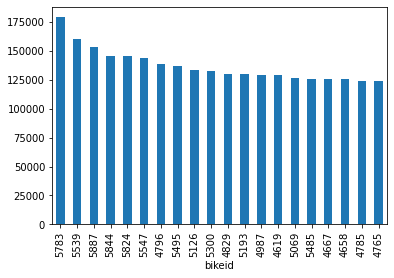

In [23]:
df.groupby(['bikeid'])['bikeid'].sum().sort_values(ascending = False).head(20).plot.bar()

<AxesSubplot:xlabel='bikeid'>

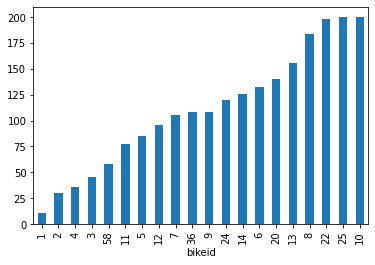

In [24]:
df.groupby(['bikeid'])['bikeid'].sum().sort_values(ascending = True).head(20).plot.bar()

In [25]:
df['bikeid'].sort_values(ascending = False).value_counts()

648     34
5783    31
3098    30
1349    30
3733    30
        ..
3188     1
58       1
3755     1
3390     1
5266     1
Name: bikeid, Length: 5713, dtype: int64

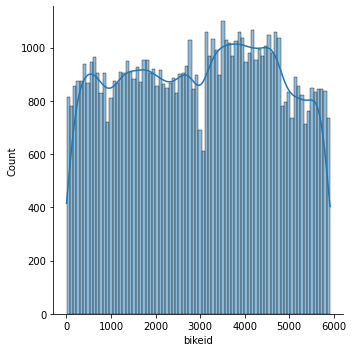

In [26]:
sns.displot(df['bikeid'], bins=80, kde=True)

In [27]:
df['bikeid'].mode()

0    648
dtype: int64

<AxesSubplot:xlabel='bikeid'>

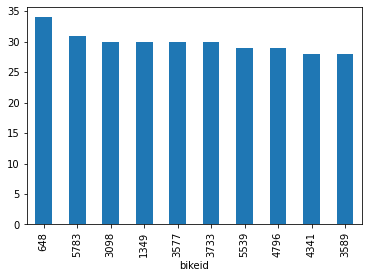

In [28]:
df.groupby(['bikeid']).size().sort_values(ascending=False).head(10).plot(kind= 'bar')

So most frequntly used bike is 648

<AxesSubplot:xlabel='from_station_id'>

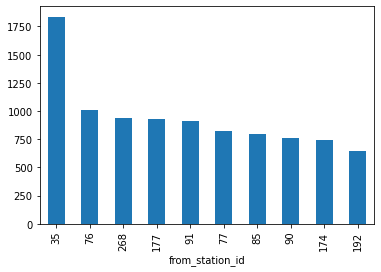

In [29]:
## most frequent station used
# only start
df.groupby(['from_station_id']).size().sort_values(ascending=False).head(10).plot(kind='bar')

<AxesSubplot:xlabel='to_station_id'>

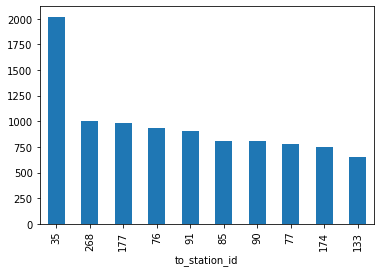

In [30]:
df.groupby(['to_station_id']).size().sort_values(ascending=False).head(10).plot(kind='bar')

Hence as per graph 35 is most Start and Stop location of growth

In [31]:
# lets check objects columns
obj = [col for col in df.columns if df[col].dtype == 'O']

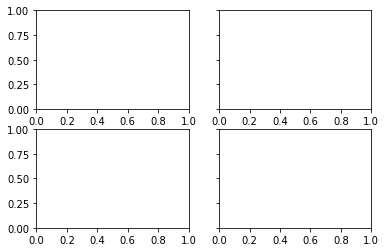

In [32]:
fig, axes = plt.subplots(2, 2, sharey = True)

# Washington DataBase

In [37]:
df = Wash

In [38]:
df.head()

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type
0,427387,3/31/2016 22:57,3/31/2016 23:04,31602,Park Rd & Holmead Pl NW,31207,Georgia Ave and Fairmont St NW,W20842,Registered
1,587551,3/31/2016 22:46,3/31/2016 22:56,31105,14th & Harvard St NW,31266,11th & M St NW,W21385,Registered
2,397979,3/31/2016 22:46,3/31/2016 22:53,31634,3rd & Tingey St SE,31108,4th & M St SW,W00773,Registered
3,444282,3/31/2016 22:42,3/31/2016 22:50,31200,Massachusetts Ave & Dupont Circle NW,31201,15th & P St NW,W21397,Registered
4,780875,3/31/2016 22:21,3/31/2016 22:34,31203,14th & Rhode Island Ave NW,31604,3rd & H St NW,W00213,Registered


In [39]:
pd.Series([1, 2, 3, 4, 5, 6, 7, 7, 8, 9])

AttributeError: 'DataFrame' object has no attribute 'Series'